In [ ]:
!pip install python-docx

In [ ]:
!pip install python-doc

In [ ]:
!pip install PyPDF2

In [329]:
import os
import pandas as pd
import numpy as np
import docx
import PyPDF2

In [214]:
root_directory = r'C:\Users\DELL\Documents\ExcelR\Data Science Project P266\Data\Resumes'

In [215]:
# Initialize lists to store data
company_names = []
file_names = []
file_contents = []
file_types = []

In [216]:
for company_dir in os.listdir(root_directory):
    # Skip if it's not a directory
    if not os.path.isdir(os.path.join(root_directory, company_dir)):
        continue
    
    # Iterate through files in the company directory
    for file in os.listdir(os.path.join(root_directory, company_dir)):
        file_path = os.path.join(root_directory, company_dir, file)
        extension = os.path.splitext(file_path)[1].lower()
        
        if extension == '.docx':
            # Extract text from .docx file using python-docx
            doc = docx.Document(file_path)
            text = ' '.join([p.text for p in doc.paragraphs])
        elif extension == '.pdf':
            # Extract text from .pdf file using PyPDF2
            with open(file_path, 'rb') as pdf_file:
                reader = PyPDF2.PdfReader(pdf_file)
                text = ' '.join([page.extract_text() for page in reader.pages])
        else:
            continue
        
        # Append data to lists
        company_names.append(company_dir)
        file_names.append(file)
        file_contents.append(text)
        file_types.append(extension)

In [217]:
data = {
    'Company Name': company_names,
    'File Name': file_names,
    'File Content': file_contents,
    'File Type': file_types
}

data = pd.DataFrame(data)

# Display the dataframe
#print(df)

In [218]:
data

,Company Name,File Name,File Content,File Type
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t To work in a glob...,.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,\t Profile Summary:\t\t\t\t\t\t\t\t\t\t...,.docx
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,PeopleSoft Database Administrator ...,.docx
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,Murali Experience Summary I have 6 years of...,.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,"Priyanka Ramadoss 61/46, MountPleasant, Coono...",.docx
...,...,...,...,...
74,workday resumes,Sri Krishna S_Hexaware.docx,\tWorkday Integration Consultant Name ...,.docx
75,workday resumes,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,.docx
76,workday resumes,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...,.docx
77,workday resumes,Venkateswarlu B_Hexaware.docx,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,.docx


In [219]:
data.shape

(79, 4)

### There are totally 79 resumes in the given dataset.

## Data Cleaning and Preprocessing

In [220]:
data.duplicated().sum()

0

#### There are no duplicate entries in the extracted dataframe.

In [221]:
data.isna().sum()

Company Name    0
File Name       0
File Content    0
File Type       0
dtype: int64

In [222]:
data.isnull().sum()

Company Name    0
File Name       0
File Content    0
File Type       0
dtype: int64

#### There are no null entries in the data. 

### Preprocess Resume Text 

#### 1. Convert the entire resume text to lowercase to make it case-insensitive: 

In [223]:
data['File Content'] = data['File Content'].apply(lambda x: x.lower())

In [224]:
data.head()

,Company Name,File Name,File Content,File Type
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh\t\t to work in a glob...,.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,\t profile summary:\t\t\t\t\t\t\t\t\t\t...,.docx
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator ...,.docx
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary i have 6 years of...,.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,"priyanka ramadoss 61/46, mountpleasant, coono...",.docx


#### 2. Remove Special Characters

In [225]:
import re
data['File Content'] = data['File Content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [226]:
data.head()

,Company Name,File Name,File Content,File Type
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh\t\t to work in a glob...,.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,\t profile summary\t\t\t\t\t\t\t\t\t\t ...,.docx
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator ...,.docx
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary i have 6 years of...,.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor ...,.docx


#### 3. Tokenization

In [227]:
import nltk
nltk.download('punkt')
data['File Content'] = data['File Content'].apply(lambda x: nltk.word_tokenize(x))
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Company Name,File Name,File Content,File Type
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,"[anubhav, kumar, singh, to, work, in, a, globa...",.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,"[profile, summary, 7, years, of, experience, i...",.docx
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,"[peoplesoft, database, administrator, gangared...",.docx
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,"[murali, experience, summary, i, have, 6, year...",.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,"[priyanka, ramadoss, 6146, mountpleasant, coon...",.docx


#### 4. Remove Stopwords

In [228]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [229]:
stop_words = set(stopwords.words('english'))
data['File Content'] = data['File Content'].apply(lambda x: [word for word in x if word not in stop_words])

In [230]:
data.head()

,Company Name,File Name,File Content,File Type
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,"[anubhav, kumar, singh, work, globally, compet...",.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,"[profile, summary, 7, years, experience, imple...",.docx
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,"[peoplesoft, database, administrator, gangared...",.docx
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,"[murali, experience, summary, 6, years, experi...",.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,"[priyanka, ramadoss, 6146, mountpleasant, coon...",.docx


#### 5. Join Words Back to Text

In [231]:
data['File Content'] = data['File Content'].apply(lambda x: ' '.join(x))
data.head()

,Company Name,File Name,File Content,File Type
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx


### Lemmatization and Stemming

In [232]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# Function for Stemming
def stem_text(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in word_tokenize(text)])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [233]:
data['Lemmatized Content'] = data['File Content'].apply(lemmatize_text)
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...


In [234]:
data['Stemmed Content'] = data['File Content'].apply(stem_text)
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...


In [235]:
df = data[['Company Name', 'Stemmed Content']]

In [236]:
df.head()

,Company Name,Stemmed Content
0,Peoplesoft resumes,anubhav kumar singh work global competit envir...
1,Peoplesoft resumes,profil summari 7 year experi implement upgrad ...
2,Peoplesoft resumes,peoplesoft databas administr gangareddi profes...
3,Peoplesoft resumes,murali experi summari 6 year experi work peopl...
4,Peoplesoft resumes,priyanka ramadoss 6146 mountpleas coonoor nilg...


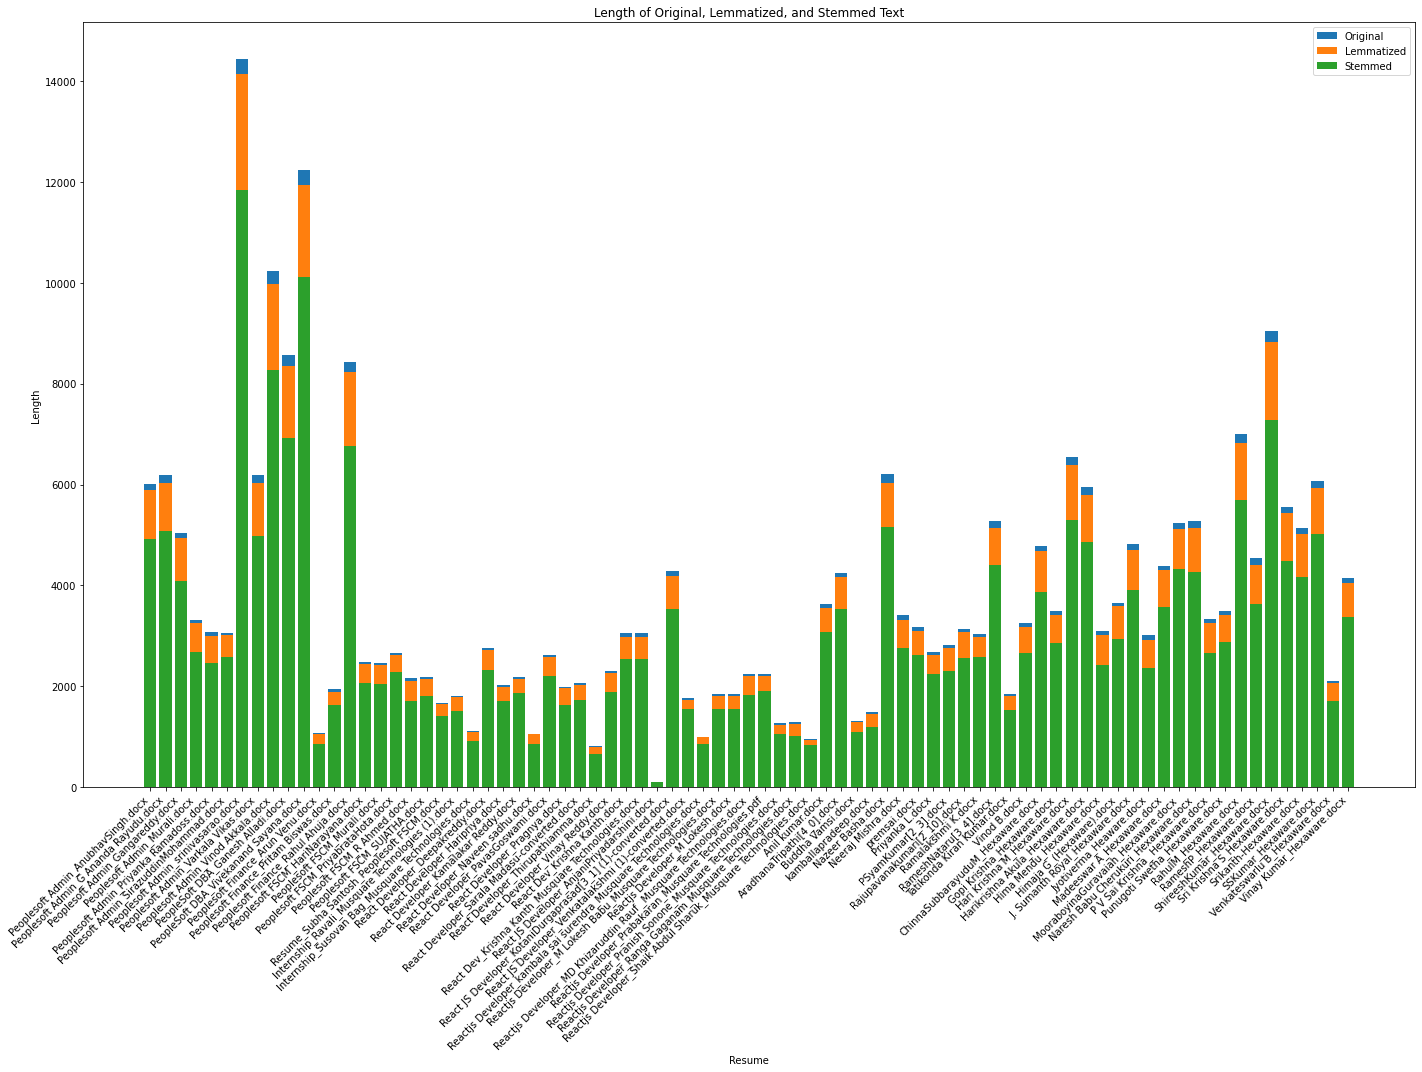

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.bar(data['File Name'], data['File Content'].apply(len), label='Original')
plt.bar(data['File Name'], data['Lemmatized Content'].apply(len), label='Lemmatized')
plt.bar(data['File Name'], data['Stemmed Content'].apply(len), label='Stemmed')
plt.xlabel('Resume')
plt.ylabel('Length')
plt.title('Length of Original, Lemmatized, and Stemmed Text')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 6. Summary Statistics

In [238]:
resume_lengths = data['File Content'].apply(len)
mean_length = resume_lengths.mean()
median_length = resume_lengths.median()
std_length = resume_lengths.std()

# EDA

#### 1. Resume distribution across companies

In [239]:
import matplotlib.pyplot as plt

company_counts = data['Company Name'].value_counts()

In [240]:
company_counts

React JS Developer                 24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Company Name, dtype: int64

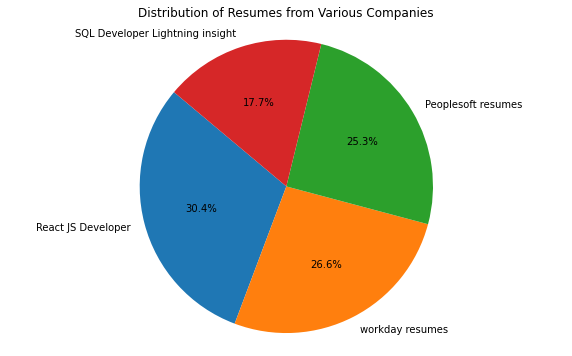

In [241]:
plt.figure(figsize=(10, 6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Resumes from Various Companies')
plt.axis('equal')  
plt.show()

#### 2. Word Frequency Analysis:

In [ ]:
!pip install wordcloud

In [242]:
from wordcloud import WordCloud
data['Tokens'] = data['File Content'].apply(nltk.word_tokenize)

In [243]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet..."
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple..."
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared..."
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi..."
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon..."


In [244]:
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

In [245]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet..."
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple..."
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared..."
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi..."
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon..."


In [246]:
word_freq = nltk.FreqDist([word for words in data['Tokens'] for word in words])

In [247]:
word_freq

FreqDist({'experience': 563, 'peoplesoft': 385, 'using': 375, 'application': 367, 'workday': 362, 'server': 315, 'reports': 306, 'data': 303, 'project': 253, 'business': 251, ...})

In [ ]:
!pip install --upgrade pillow

In [ ]:
!pip install --upgrade pip

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency in Resumes')
plt.show()

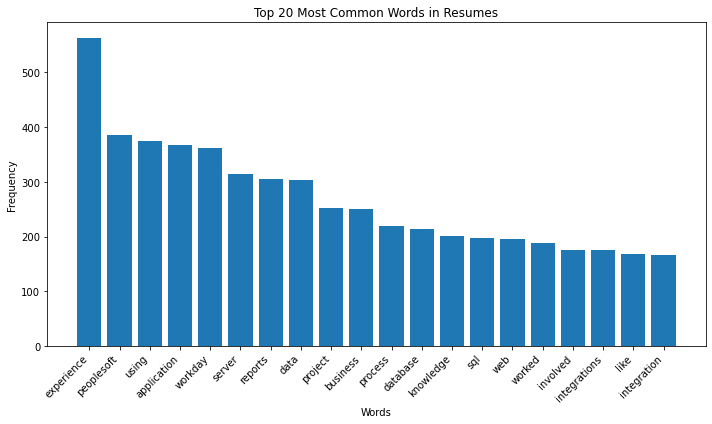

In [248]:
N = 20
most_common_words = word_freq.most_common(N)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {N} Most Common Words in Resumes')
plt.tight_layout()
plt.show()

#### 3. Resume length analysis

In [249]:
data['Character Length'] = data['File Content'].apply(len)

data['Word Length'] = data['File Content'].apply(lambda x: len(x.split()))

In [250]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359


In [251]:
data.shape

(79, 9)

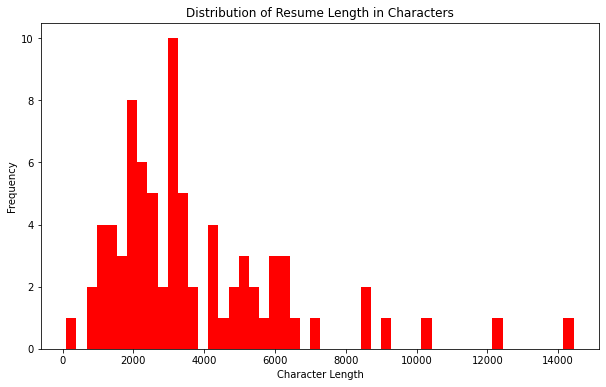

In [252]:
plt.figure(figsize=(10, 6))
plt.hist(data['Character Length'], bins=50, color='red')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Distribution of Resume Length in Characters')
plt.show()

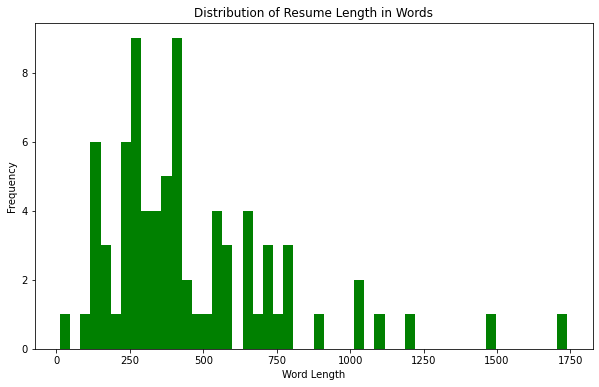

In [253]:
plt.figure(figsize=(10, 6))
plt.hist(data['Word Length'], bins=50, color='green')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Resume Length in Words')
plt.show()

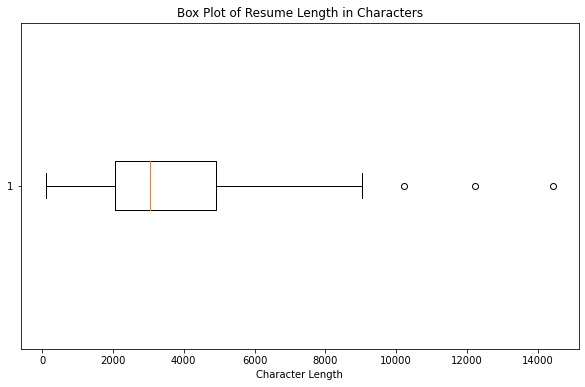

In [254]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Character Length'], vert=False)
plt.xlabel('Character Length')
plt.title('Box Plot of Resume Length in Characters')
plt.show()

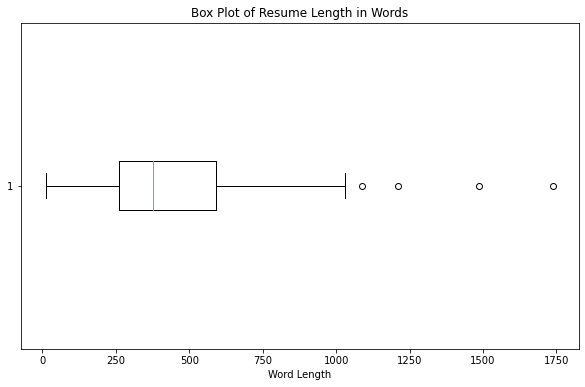

In [255]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Word Length'], vert=False)
plt.xlabel('Word Length')
plt.title('Box Plot of Resume Length in Words')
plt.show()

In [256]:
resume_length_by_company = data.groupby('Company Name').agg({'Character Length': 'sum',
                                                             'Word Length': 'sum'}).reset_index()

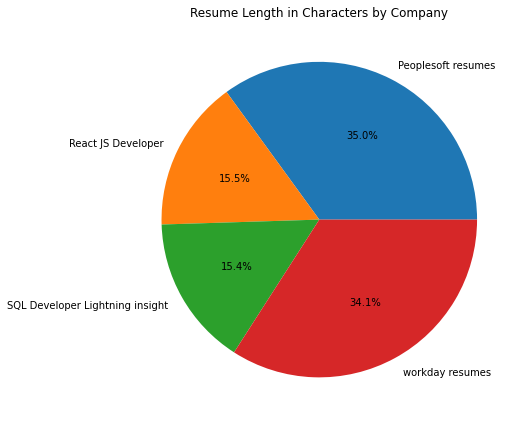

In [257]:
plt.figure(figsize=(10, 6))
plt.pie(resume_length_by_company['Character Length'], labels=resume_length_by_company['Company Name'], autopct='%1.1f%%')
plt.title('Resume Length in Characters by Company')
plt.tight_layout()
plt.show()

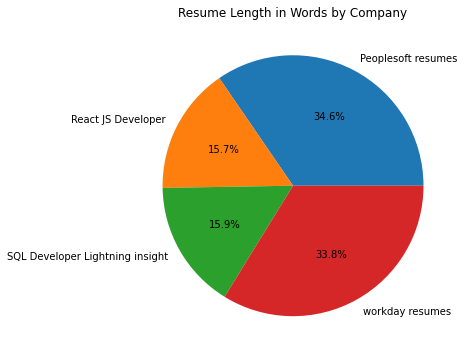

In [258]:
plt.figure(figsize=(10, 6))
plt.pie(resume_length_by_company['Word Length'], labels=resume_length_by_company['Company Name'], autopct='%1.1f%%')
plt.title('Resume Length in Words by Company')
plt.show()

#### This distribution shows that "workday resumes" and "Peoplesoft resumes" have more length in words and characters.

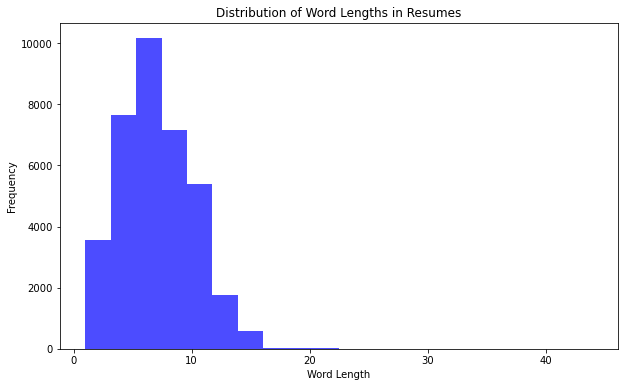

In [259]:
# Function to get word lengths from resume content
def get_word_lengths(text):
    words = nltk.word_tokenize(text)
    word_lengths = [len(word) for word in words]
    return word_lengths

# Get word lengths for all resumes
all_resumes_word_lengths = data['File Content'].apply(get_word_lengths)

# Flatten the list of word lengths
all_resumes_word_lengths_flat = [length for lengths in all_resumes_word_lengths for length in lengths]

# Create a histogram for word lengths
plt.figure(figsize=(10, 6))
plt.hist(all_resumes_word_lengths_flat, bins=20, alpha=0.7, color='blue')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths in Resumes')
plt.show()


In [260]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359


In [261]:
data['Paragraphs'] = data['File Content'].apply(lambda x: len(x.split('\n\n')))
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length,Paragraphs
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729,1
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748,1
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590,1
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403,1
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359,1


In [262]:
file_type_counts = data['File Type'].value_counts()
file_type_counts

.docx    78
.pdf      1
Name: File Type, dtype: int64

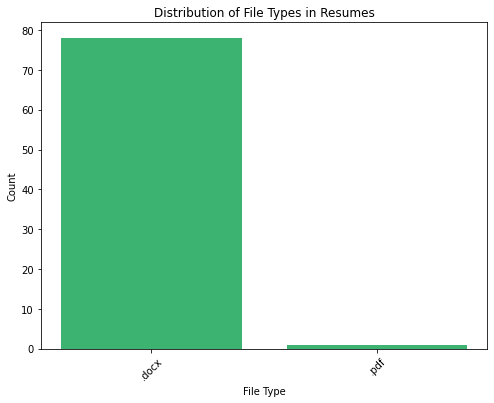

In [263]:
plt.figure(figsize=(8, 6))
plt.bar(file_type_counts.index, file_type_counts.values, color='mediumseagreen')
plt.xticks(rotation=45)
plt.xlabel('File Type')
plt.ylabel('Count')
plt.title('Distribution of File Types in Resumes')
plt.show()

#### 4. Sentiment Analysis

In [264]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [ ]:
!pip install textblob

In [265]:
from textblob import TextBlob

In [266]:
data['Sentiment Polarity'] = data['File Content'].apply(get_sentiment)
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length,Paragraphs,Sentiment Polarity
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729,1,0.106445
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748,1,0.258354
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590,1,0.254878
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403,1,0.019577
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359,1,0.178986


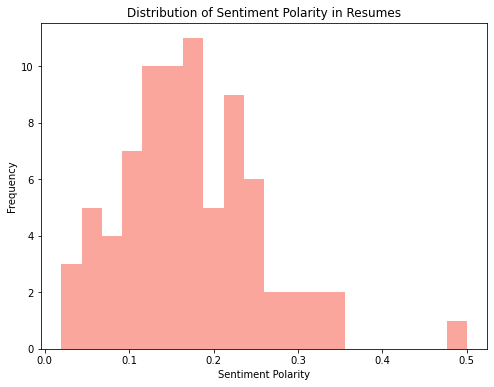

In [267]:
plt.figure(figsize=(8, 6))
plt.hist(data['Sentiment Polarity'].dropna(), bins=20, color='salmon', alpha=0.7)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Resumes')
plt.show()

#### 5. Top Words by Company 

In [268]:
grouped_data = data.groupby('Company Name')
grouped_data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length,Paragraphs,Sentiment Polarity
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729,1,0.106445
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748,1,0.258354
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590,1,0.254878
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403,1,0.019577
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359,1,0.178986
20,React JS Developer,Internship_Ravali_Musquare Technologies (1).docx,name ravali p curriculum vitae specialization ...,.docx,name ravali p curriculum vitae specialization ...,name ravali p curriculum vita special comput s...,"[name, ravali, p, curriculum, vitae, specializ...",1809,212,1,0.500260
21,React JS Developer,Internship_Susovan Bag_Musquare Technologies.docx,susovan bag seeking challenging position field...,.docx,susovan bag seeking challenging position field...,susovan bag seek challeng posit field scienc t...,"[susovan, bag, seeking, challenging, position,...",1112,137,1,0.346032
22,React JS Developer,React Developer_Deepakreddy.docx,kanumuru deepak reddy career objective secure ...,.docx,kanumuru deepak reddy career objective secure ...,kanumuru deepak reddi career object secur posi...,"[kanumuru, deepak, reddy, career, objective, s...",2766,341,1,0.248249
23,React JS Developer,React Developer_Haripriya.docx,haripriya battina experience ui developer reac...,.docx,haripriya battina experience ui developer reac...,haripriya battina experi ui develop reactj jav...,"[haripriya, battina, experience, ui, developer...",2033,261,1,0.190710
24,React JS Developer,React Developer_Kamalakar Reddy.docx,kamalakar reddy linked httpswwwlinkedincominka...,.docx,kamalakar reddy linked httpswwwlinkedincominka...,kamalakar reddi link httpswwwlinkedincominkama...,"[kamalakar, reddy, linked, httpswwwlinkedincom...",2190,261,1,0.136434


In [269]:
def get_top_words(text):
    words = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

In [270]:
from collections import Counter
top_words_by_company = {}
for company, group in grouped_data:
    words_list = group['File Content'].apply(get_top_words)
    all_words = [word for words in words_list for word in words]
    top_words = Counter(all_words).most_common(10)
    top_words_by_company[company] = top_words

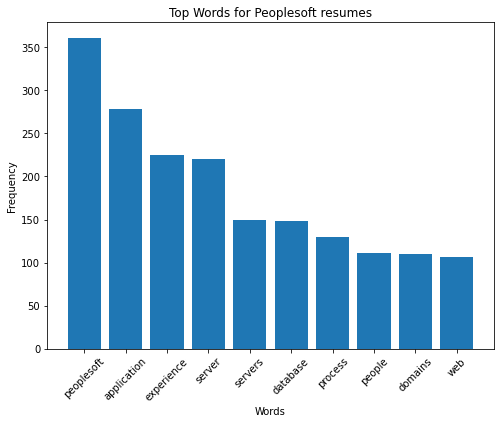

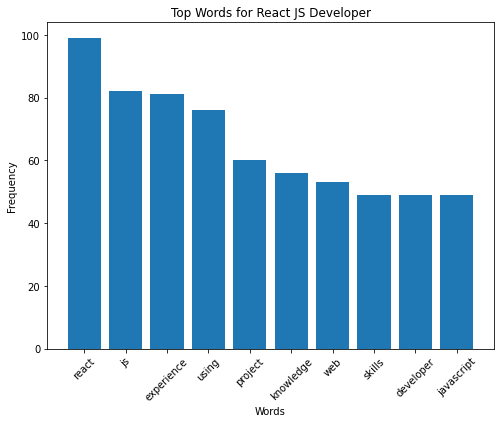

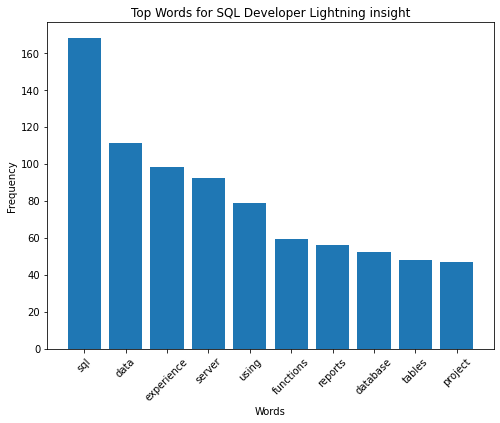

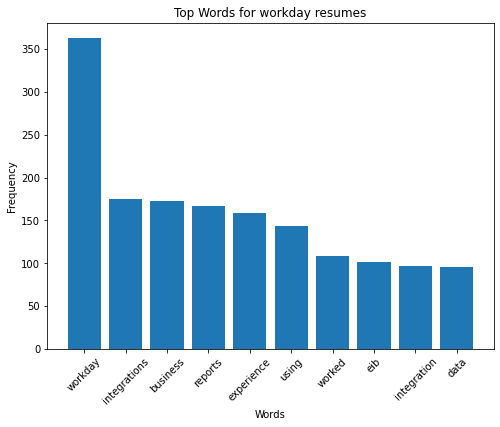

In [271]:
for company, top_words in top_words_by_company.items():
    plt.figure(figsize=(8, 6))
    words, frequencies = zip(*top_words)
    plt.bar(words, frequencies)
    plt.title(f"Top Words for {company}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

#### 5. Word cloud for each company 

In [272]:
from wordcloud import WordCloud

In [ ]:
companies = data['Company Name'].unique()
for company in companies:
    text = ' '.join(data[data['Company Name'] == company]['File Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {company}')
    plt.axis('off')
    plt.show()

#### Name Entity Recognition (NER)

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [273]:
import spacy

In [274]:
nlp = spacy.load('en_core_web_sm')
for text in data['File Content']:
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'LOC']:
            print(ent.text, ent.label_)

anubhav kumar singh PERSON
github PERSON
pum peoplesoft PERSON
ibm ORG
pum peopletools PERSON
ps ORG
pum dpk PERSON
awsec2 PERSON
texas department transportationtxdot ORG
jdk java PERSON
safalta infotech pvt ltd ORG
jdk java PERSON
dsc algonquin college canada ORG
neerukonda institute technology sciences andhra university awards ORG
ananda ORG
hereby declare ORG
ananda ORG
oracle peoplesoft ORG
sql ORG
backups exp PERSON
pum peoplesoft PERSON
weblogic PERSON
pt855 ORG
setup pum PERSON
pvt ltd client credit suisse ORG
engg mvgr college engineering vizianagaramjntuk aggregate ORG
pat back capgemini PERSON
r2 PERSON
microsoft sql management ORG
microsoft ORG
sql ORG
sql oracle ORG
balancers iam s3 PERSON
lenora college ORG
june2012 PERSON
nissan ORG
fscm92 hrms92 PERSON
ren ORG
oracle data ORG
awr addm PERSON
oracle data ORG
awr addm PERSON
rac solaris PERSON
sql server expertise ORG
rac datagaurd oracle PERSON
oracle data ORG
awr addm PERSON
ge health care responsibilities project migrat

xslt transformation code knowledge xml ORG
data systems ltd ORG
gap inc usa june 2019 ORG
gap inc american ORG
gap inc largest ORG
healthcare ORG
bumiputra commerce bank ORG
sequence generator joiner ORG
picof cloud connectors custom report ORG
eib core connectors functional expertise ORG
ps ORG
ps querys PERSON
ps query xml ORG
fitgap ORG
thomson reuters ORG
thomson reuters corporation ORG
eib ORG
ps ORG
ps querys PERSON
ps query xml ORG
fireeye bangalore PERSON
description fireeye ORG
hereby declare ORG
eib picof PERSON
ps ORG
picof peci ORG
eib ccwccb PERSON
eibs ORG
picof dt PERSON
jun 2016 till PERSON
ps ORG
description cdk PERSON
sqer ps PERSON
ps system ORG
community college usa workday ORG
april16 oct17 amdocs PERSON
shireesh balasani PERSON
eibs ORG
dev itinfosys ltd PERSON
workday hcmhr ORG
hris PERSON
tachus software PERSON
osmania university college commerce business management ORG
osmania university college commerce business management ORG
hris PERSON
lawson lawson PERSON


#### Language Distribution

In [ ]:
!pip install langdetect

In [275]:
from langdetect import detect

In [276]:
data['Language'] = data['File Content'].apply(lambda x: detect(x))

In [277]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length,Paragraphs,Sentiment Polarity,Language
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729,1,0.106445,en
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748,1,0.258354,en
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590,1,0.254878,en
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403,1,0.019577,en
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359,1,0.178986,en


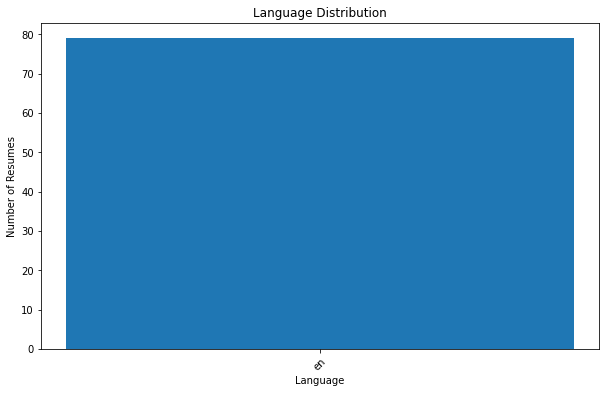

In [278]:
# Assuming you have language tags for each resume, you can use this to analyze the language distribution
language_counts = data['Language'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Number of Resumes')
plt.title('Language Distribution')
plt.xticks(rotation=45)
plt.show()


In [279]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [280]:
def preprocess_text(text):
    # Your preprocessing steps (cleaning, tokenization, etc.)
    # Replace the code below with your specific preprocessing logic

    # Sample code (lowercasing and removing non-alphanumeric characters)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text


In [281]:
data['Processed Content'] = data['File Content'].apply(preprocess_text)

In [282]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length,Paragraphs,Sentiment Polarity,Language,Processed Content
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729,1,0.106445,en,anubhav kumar singh work globally competitive ...
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748,1,0.258354,en,profile summary years experience implementing...
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590,1,0.254878,en,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403,1,0.019577,en,murali experience summary years experience wo...
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359,1,0.178986,en,priyanka ramadoss mountpleasant coonoor nilgi...


In [283]:
tfidf_vectorizer = TfidfVectorizer()

In [284]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed Content'])

In [285]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [286]:
most_similar_resumes = {}
for idx, row in data.iterrows():
    similar_resumes = list(enumerate(cosine_sim[idx]))
    # Sort similar resumes by similarity score in descending order
    similar_resumes = sorted(similar_resumes, key=lambda x: x[1], reverse=True)
    # Exclude the resume itself from the most similar list
    most_similar_resumes[idx] = [(i, score) for i, score in similar_resumes if i != idx]

In [287]:
for idx, similar_resumes in most_similar_resumes.items():
    print("Resume Index:", idx)
    print("Most Similar Resumes:")
    for i, score in similar_resumes[:5]:  # Top 5 most similar resumes
        print("  Similar Resume Index:", i)
        print("  Similarity Score:", score)
        print("=" * 50)

Resume Index: 0
Most Similar Resumes:
  Similar Resume Index: 10
  Similarity Score: 0.5777849564777964
  Similar Resume Index: 6
  Similarity Score: 0.5462592262796307
  Similar Resume Index: 7
  Similarity Score: 0.5277925238213464
  Similar Resume Index: 9
  Similarity Score: 0.5265961581391
  Similar Resume Index: 1
  Similarity Score: 0.5058325347096964
Resume Index: 1
Most Similar Resumes:
  Similar Resume Index: 6
  Similarity Score: 0.5901710063348947
  Similar Resume Index: 7
  Similarity Score: 0.5667576463044074
  Similar Resume Index: 10
  Similarity Score: 0.5623907288671972
  Similar Resume Index: 9
  Similarity Score: 0.561102620093606
  Similar Resume Index: 8
  Similarity Score: 0.5251612659131867
Resume Index: 2
Most Similar Resumes:
  Similar Resume Index: 9
  Similarity Score: 0.6124945080298912
  Similar Resume Index: 7
  Similarity Score: 0.6041802449685836
  Similar Resume Index: 6
  Similarity Score: 0.5976408729862357
  Similar Resume Index: 8
  Similarity Scor

  Similar Resume Index: 37
  Similarity Score: 1.0000000000000002
  Similar Resume Index: 31
  Similarity Score: 0.3209734175552419
  Similar Resume Index: 32
  Similarity Score: 0.3209734175552419
  Similar Resume Index: 34
  Similarity Score: 0.277429069011819
  Similar Resume Index: 41
  Similarity Score: 0.24926324474506134
Resume Index: 39
Most Similar Resumes:
  Similar Resume Index: 31
  Similarity Score: 0.331162143052973
  Similar Resume Index: 32
  Similarity Score: 0.331162143052973
  Similar Resume Index: 41
  Similarity Score: 0.2887741944799267
  Similar Resume Index: 34
  Similarity Score: 0.21884143182151308
  Similar Resume Index: 28
  Similarity Score: 0.1998619220757704
Resume Index: 40
Most Similar Resumes:
  Similar Resume Index: 31
  Similarity Score: 0.19781357821763493
  Similar Resume Index: 32
  Similarity Score: 0.19781357821763493
  Similar Resume Index: 41
  Similarity Score: 0.18418612248472882
  Similar Resume Index: 27
  Similarity Score: 0.1826814525345

#### Resume Clustering 

In [288]:
from sklearn.cluster import KMeans

In [289]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['File Content'])

In [290]:
num_clusters = 3

In [291]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

In [292]:
data.head()

,Company Name,File Name,File Content,File Type,Lemmatized Content,Stemmed Content,Tokens,Character Length,Word Length,Paragraphs,Sentiment Polarity,Language,Processed Content,Cluster
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,.docx,anubhav kumar singh work globally competitive ...,anubhav kumar singh work global competit envir...,"[anubhav, kumar, singh, work, globally, compet...",6016,729,1,0.106445,en,anubhav kumar singh work globally competitive ...,2
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary 7 years experience implementin...,.docx,profile summary 7 year experience implementing...,profil summari 7 year experi implement upgrad ...,"[profile, summary, 7, years, experience, imple...",6191,748,1,0.258354,en,profile summary years experience implementing...,2
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,.docx,peoplesoft database administrator gangareddy p...,peoplesoft databas administr gangareddi profes...,"[peoplesoft, database, administrator, gangared...",5031,590,1,0.254878,en,peoplesoft database administrator gangareddy p...,2
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,murali experience summary 6 years experience w...,.docx,murali experience summary 6 year experience wo...,murali experi summari 6 year experi work peopl...,"[murali, experience, summary, 6, years, experi...",3320,403,1,0.019577,en,murali experience summary years experience wo...,2
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,.docx,priyanka ramadoss 6146 mountpleasant coonoor n...,priyanka ramadoss 6146 mountpleas coonoor nilg...,"[priyanka, ramadoss, 6146, mountpleasant, coon...",3072,359,1,0.178986,en,priyanka ramadoss mountpleasant coonoor nilgi...,2


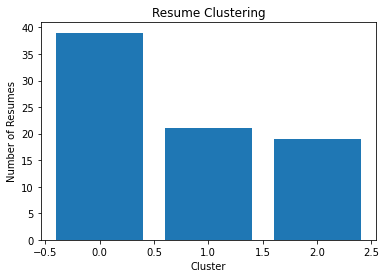

In [293]:
cluster_counts = data['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Resumes')
plt.title('Resume Clustering')
plt.show()

#### Resume Recommendations 

In [294]:
from sklearn.metrics.pairwise import linear_kernel
similarity_scores = linear_kernel(tfidf_matrix, tfidf_matrix)

In [295]:
similarity_scores

array([[1.        , 0.50098074, 0.42530011, ..., 0.12728948, 0.08852204,
        0.12773779],
       [0.50098074, 1.        , 0.46357018, ..., 0.1277897 , 0.09442378,
        0.13720967],
       [0.42530011, 0.46357018, 1.        , ..., 0.10455408, 0.0753003 ,
        0.13059313],
       ...,
       [0.12728948, 0.1277897 , 0.10455408, ..., 1.        , 0.533738  ,
        0.69131655],
       [0.08852204, 0.09442378, 0.0753003 , ..., 0.533738  , 1.        ,
        0.52385603],
       [0.12773779, 0.13720967, 0.13059313, ..., 0.69131655, 0.52385603,
        1.        ]])

In [296]:
target_resume_index = 0  
num_recommendations = 5  

In [297]:
similar_resumes_indexes = similarity_scores[target_resume_index].argsort()[::-1][1:num_recommendations+1]

In [298]:
similar_resumes = data.iloc[similar_resumes_indexes]

In [299]:
print(similar_resumes[['Company Name', 'File Name', 'File Content']])

          Company Name                              File Name  \
10  Peoplesoft resumes  PeopleSoft DBA_Vivekanand Sayana.docx   
6   Peoplesoft resumes     Peoplesoft Admin_srinivasarao.docx   
7   Peoplesoft resumes    Peoplesoft Admin_Varkala Vikas.docx   
9   Peoplesoft resumes      PeopleSoft DBA_Ganesh Alladi.docx   
1   Peoplesoft resumes  Peoplesoft Admin_G Ananda Rayudu.docx   

                                         File Content  
10  peoplesoft administration vivekanand sayana ca...  
6   peoplesoft administrator srinivask experience ...  
7   peoplesoft admin varkala vikas career objectiv...  
9   peoplesoft adminpeoplesoft dba ganesh alladi c...  
1   profile summary 7 years experience implementin...  


## Feature Extraction

In [300]:
df.head()

,Company Name,Stemmed Content
0,Peoplesoft resumes,anubhav kumar singh work global competit envir...
1,Peoplesoft resumes,profil summari 7 year experi implement upgrad ...
2,Peoplesoft resumes,peoplesoft databas administr gangareddi profes...
3,Peoplesoft resumes,murali experi summari 6 year experi work peopl...
4,Peoplesoft resumes,priyanka ramadoss 6146 mountpleas coonoor nilg...


In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [302]:
df = df.rename(columns = {'Company Name':'Company_Name', 'Stemmed Content':'Stemmed_Content'})
df.head()

,Company_Name,Stemmed_Content
0,Peoplesoft resumes,anubhav kumar singh work global competit envir...
1,Peoplesoft resumes,profil summari 7 year experi implement upgrad ...
2,Peoplesoft resumes,peoplesoft databas administr gangareddi profes...
3,Peoplesoft resumes,murali experi summari 6 year experi work peopl...
4,Peoplesoft resumes,priyanka ramadoss 6146 mountpleas coonoor nilg...


In [303]:
labelencoder = LabelEncoder()
df['Company_Name'] = labelencoder.fit_transform(df['Company_Name'])
df.head()

,Company_Name,Stemmed_Content
0,0,anubhav kumar singh work global competit envir...
1,0,profil summari 7 year experi implement upgrad ...
2,0,peoplesoft databas administr gangareddi profes...
3,0,murali experi summari 6 year experi work peopl...
4,0,priyanka ramadoss 6146 mountpleas coonoor nilg...


In [304]:
df.Company_Name.value_counts()

1    24
3    21
0    20
2    14
Name: Company_Name, dtype: int64

In [305]:
# Separating the features and Y variables
X = df['Stemmed_Content'].values
Y = df['Company_Name'].values

In [306]:
print(X)

['anubhav kumar singh work global competit environ challeng assign shall yield twin benefit job satisfact steadypac profession growth profession experi 062019 current hcl current role system admin offshor skill shell script linux peoplesoft administr github manag peoplesoft hcm peoplesoft fscm product environ along support environ instal linux window os involv day day activ project migrat databas refresh system admin chang tax updat etc troubleshoot variou server like applic server web server process schedul server appli tuxedo weblog middlewar cpu patch variou applic work shell script use integr method exchang file extern system instal troubleshoot 2tier setup per requir review vulner report secur team renew ssl weblog vulner remedi whenev vulner report rmi team work pum peoplesoft updat manag instal dpk work knowledg ansibl docker develop new shell script troubleshoot shell script failur 072017 062019 techmahindra roleproject applic support automationdevop tool peoplesoft admin skill

In [307]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3]


In [308]:
Y.shape

(79,)

### Convert the Text Data to Feature Vectors

In [309]:
vectorizer = TfidfVectorizer()

In [310]:
X = vectorizer.fit_transform(X)

In [311]:
print(X)

  (0, 1034)	0.0124351957785956
  (0, 2363)	0.013930200048708473
  (0, 301)	0.032419730044391845
  (0, 13)	0.032419730044391845
  (0, 51)	0.032419730044391845
  (0, 2527)	0.02375790846299107
  (0, 3471)	0.021291795714891548
  (0, 675)	0.020031192683745754
  (0, 758)	0.02063280451454674
  (0, 1611)	0.02762718958889591
  (0, 1501)	0.02834565510399838
  (0, 264)	0.02762718958889591
  (0, 234)	0.032419730044391845
  (0, 339)	0.032419730044391845
  (0, 1937)	0.0248703915571912
  (0, 2154)	0.032419730044391845
  (0, 3354)	0.032419730044391845
  (0, 1055)	0.011706714803899669
  (0, 3493)	0.02762718958889591
  (0, 837)	0.02063280451454674
  (0, 2319)	0.04751581692598214
  (0, 1616)	0.02762718958889591
  (0, 1900)	0.020031192683745754
  (0, 3351)	0.008788971878697373
  (0, 2961)	0.009631739328941385
  :	:
  (78, 3336)	0.02378329407598884
  (78, 735)	0.060227055798776394
  (78, 2039)	0.050051884612722634
  (78, 2500)	0.06663382466751026
  (78, 320)	0.02036988832336046
  (78, 964)	0.05826775337590

### Train-Test Split

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y, random_state=2)

In [314]:
X_train.shape

(55, 3548)

In [315]:
y_train.shape

(55,)

In [316]:
X_test.shape

(24, 3548)

In [317]:
y_test.shape

(24,)

# Model Building

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 1) Logistic Regression

In [319]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [320]:
classifier.intercept_

array([-0.035106  ,  0.73014961, -0.29537568, -0.39966793])

In [321]:
classifier.coef_

array([[-0.00830913, -0.00830913, -0.00830913, ...,  0.        ,
         0.02994933,  0.02695873],
       [ 0.02200423,  0.02200423,  0.02200423, ...,  0.        ,
        -0.01309134,  0.01600651],
       [-0.00709485, -0.00709485, -0.00709485, ...,  0.        ,
        -0.00865833, -0.02152035],
       [-0.00660025, -0.00660025, -0.00660025, ...,  0.        ,
        -0.00819965, -0.02144488]])

## Model Accuracy on Training Dataset

In [322]:
y_train_pred=classifier.predict(X_train)

In [323]:
logistic_train_ac=ac(y_train,y_train_pred)
logistic_train_ac

1.0

In [324]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(X_train)})
y_train_pred_df

,actual,predicted_values
0,3,3
1,3,3
2,2,2
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,2,2
9,1,1


## Model Accuracy on Testing Dataset

In [325]:
y_test_pred=classifier.predict(X_test)

In [326]:
logistic_test_ac=ac(y_test,y_test_pred)
logistic_test_ac

0.875

In [327]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(X_test)})
y_test_pred_df

,actual,predicted_values
0,1,1
1,2,2
2,3,3
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,3,3
9,2,1


In [330]:
logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(logistic_test_ac*100,2)]})
logistic_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,87.5


## Confusion Matrix for the model accuracy

In [331]:
confusion_matrix(y_test_pred,y_test)

array([[5, 0, 0, 0],
       [1, 7, 2, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 7]], dtype=int64)

## Classification report

In [333]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.70      1.00      0.82         7
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         7

    accuracy                           0.88        24
   macro avg       0.93      0.83      0.85        24
weighted avg       0.91      0.88      0.87        24



## 2) Decision Tree

In [334]:
model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

## Model Accuracy on Testing Dataset

In [335]:
# Predicting on test data
y_test_pred = model.predict(X_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    9
0    6
3    5
2    4
dtype: int64

In [336]:
DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
DT1_test_ac

0.8333333333333334

## Model Accuracy on Training Dataset

In [337]:
y_train_pred = model.predict(X_train)
DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
DT1_train_ac

1.0

In [338]:
DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(DT1_test_ac*100,2)]})
DT1_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,83.33


## Building Decision Tree Classifier using entropy Criteria

In [339]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Model Accuracy on Testing Dataset

In [340]:
# Predicting on test data
y_test_pred = model.predict(X_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    8
3    7
0    6
2    3
dtype: int64

In [341]:
DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
DT2_test_ac

0.9583333333333334

## Model Accuracy on Training Dataset

In [342]:
y_train_pred = model.predict(X_train)
DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
DT2_train_ac

1.0

In [343]:
DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(DT2_test_ac*100,2)]})
DT2_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,95.83


## 3) Random Forests

In [344]:
num_trees = 200
max_features = 60

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [345]:
results = cross_val_score(model, X, Y, cv=10)
RF_test_ac=results.mean()
RF_test_ac

0.9589285714285714

## 4) Boosting

In [346]:
num_trees = 40
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [347]:
results = cross_val_score(model, X, Y, cv=10)
Boosting_test_ac=results.mean()
Boosting_test_ac

0.9875

## Visualising the CV results

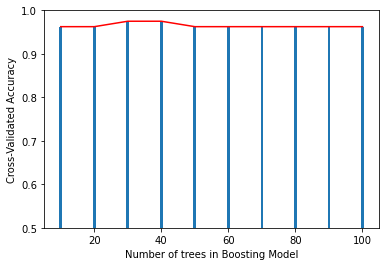

In [348]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [361]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [362]:
pred=model.predict(X_test)
KNN_test_ac=accuracy_score(pred,y_test)
KNN_test_ac

0.9583333333333334

## Grid Search for Algorithm Tuning

In [351]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [352]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [353]:
print(grid.best_score_)
print(grid.best_params_)

0.9875
{'n_neighbors': 15}


## Visualising the CV results

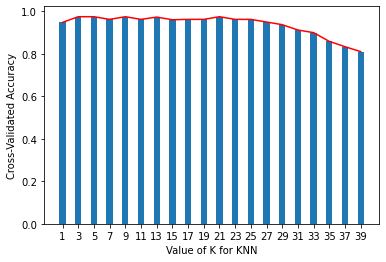

In [358]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [388]:
clf = SVC(kernel="rbf",gamma=0.4,C=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  95.83333333333334


array([[6, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 7]], dtype=int64)

In [373]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.64      1.00      0.78         7
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.91      0.79      0.81        24
weighted avg       0.89      0.83      0.83        24



## Grid Search CV (Hyperparameter tuning)

In [374]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [375]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9818181818181818)

In [391]:
# Test data accuracy
clf = SVC(C=10, gamma=0.4, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 95.83333333333334


array([[6, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 7]], dtype=int64)

In [392]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", SVM_train_ac)

Accuracy = 100.0


In [393]:
SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(SVM_test_ac,2)]})
SVM_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,95.83


## 7) Naive Bayes

### Multinomial Naive Bayes

In [394]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [395]:
y_pred = classifier_mb.predict(X_test)
NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 91.66666666666666


array([[6, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 1, 2, 1],
       [0, 0, 0, 7]], dtype=int64)

In [396]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93         7
           2       1.00      0.50      0.67         4
           3       0.88      1.00      0.93         7

    accuracy                           0.92        24
   macro avg       0.94      0.88      0.88        24
weighted avg       0.93      0.92      0.91        24



### Train data accuracy

In [397]:
y_pred_train = classifier_mb.predict(X_train)
NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", NB1_train_ac)

Accuracy = 100.0


In [398]:
NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(NB1_test_ac,2)]})
NB1_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,91.67


### Gaussian Naive Bayes

In [400]:
classifier_gb = GB()
classifier_gb.fit(X_train.toarray(),y_train)

GaussianNB()

### Test data accuracy

In [402]:
y_pred = classifier_gb.predict(X_test.toarray())
NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 83.33333333333334


array([[6, 0, 0, 0],
       [1, 5, 1, 0],
       [0, 0, 2, 2],
       [0, 0, 0, 7]], dtype=int64)

In [403]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.71      0.83         7
           2       0.67      0.50      0.57         4
           3       0.78      1.00      0.88         7

    accuracy                           0.83        24
   macro avg       0.83      0.80      0.80        24
weighted avg       0.84      0.83      0.82        24



### Train data accuracy

In [404]:
y_pred_train = classifier_gb.predict(X_train.toarray())
NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", NB2_train_ac)

Accuracy = 100.0


In [405]:
NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(NB2_test_ac,2)]})
NB2_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,83.33


## 8) Gradient Boosting

In [406]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [407]:
y_pred = gb_classifier.predict(X_test)
GB_test_ac=accuracy_score(y_pred,y_test)
GB_test_ac

0.9166666666666666

In [408]:
y_pred_train = gb_classifier.predict(X_train)
GB_train_ac = accuracy_score(y_train, y_pred_train)
GB_train_ac

1.0

In [409]:
GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(GB_test_ac*100,2)]})
GB_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,91.67


## 9) XGBoost

In [410]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [411]:
y_pred = xgb_classifier.predict(X_test)
XGB_test_ac=accuracy_score(y_pred,y_test)
XGB_test_ac

0.875

In [412]:
y_pred_train = xgb_classifier.predict(X_train)
XGB_train_ac = accuracy_score(y_train, y_pred_train)
XGB_train_ac

1.0

In [413]:
XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(XGB_test_ac*100,2)]})
XGB_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,87.5


## Grid Search CV (Hyperparameter tuning)

In [414]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.875


## 10) LightGBM

In [415]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [416]:
y_pred = lgbm_classifier.predict(X_test)
LGBM_test_ac=accuracy_score(y_pred,y_test)
LGBM_test_ac

0.9583333333333334

In [417]:
y_pred_train = lgbm_classifier.predict(X_train)
LGBM_train_ac = accuracy_score(y_train, y_pred_train)
LGBM_train_ac

1.0

In [418]:
LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(LGBM_test_ac*100,2)]})
LGBM_accuracy_df

,Training Accuracy (%),Testing Accuracy (%)
0,100.0,95.83


## Grid Search CV (Hyperparameter tuning)

In [419]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9166666666666666
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.875
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9583333333333334


In [421]:
Testing_Accuracy = {'Model': pd.Series(['Logistic Regression', 'Decision Tree', 'Random Forests', 'Boosting', 'K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)','Naive Bayes', 'Gradient Boosting', 'XGBoost', 'LightGBM']),
                                    'Model Accuracy (%)': pd.Series([round(logistic_test_ac*100,2), round(DT2_test_ac*100,2), round(RF_test_ac*100,2), round(Boosting_test_ac*100,2), round(KNN_test_ac*100,2), round(SVM_test_ac,2), round(NB1_test_ac,2), round(GB_test_ac*100,2), round(XGB_test_ac*100,2), round(LGBM_test_ac*100,2)])}
Testing_Accuracy_df = pd.DataFrame(Testing_Accuracy)
Testing_Accuracy_df

,Model,Model Accuracy (%)
0,Logistic Regression,87.50
1,Decision Tree,95.83
2,Random Forests,95.89
3,Boosting,98.75
4,K-Nearest Neighbors (KNN),95.83
5,Support Vector Machine (SVM),95.83
6,Naive Bayes,91.67
7,Gradient Boosting,91.67
8,XGBoost,87.50
9,LightGBM,95.83
